In [1]:
import pandas as pd
import matplotlib.pyplot as plt

telco = pd.read_csv(r"C:\Users\User\School\Set5\ADS\P1\Telco-Customer-Churn.csv")

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
telco['binary_churn'] = telco['Churn'].map({'Yes': 1, 'No': 0})

churn_df = telco[telco['binary_churn'] == 1]
retain_df = telco[telco['binary_churn'] == 0]

In [3]:
def histogram(df, i):
    plt.hist(df[f'{i}'])
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')
    plt.grid(True)
    plt.show()

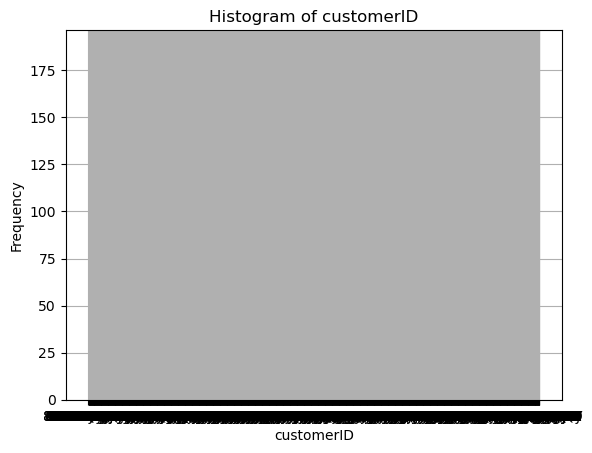

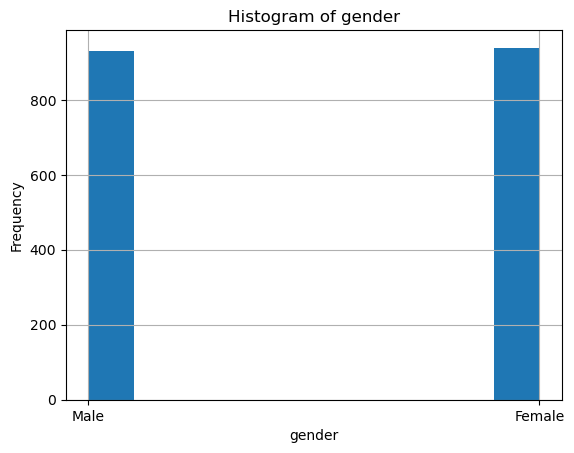

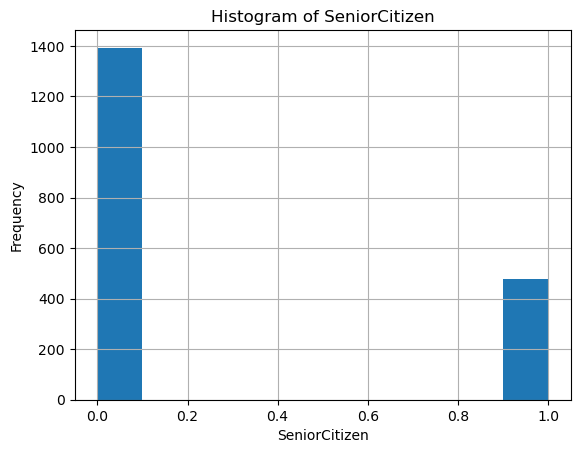

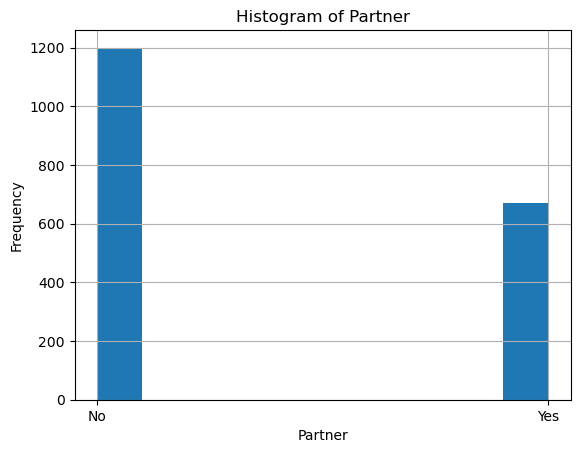

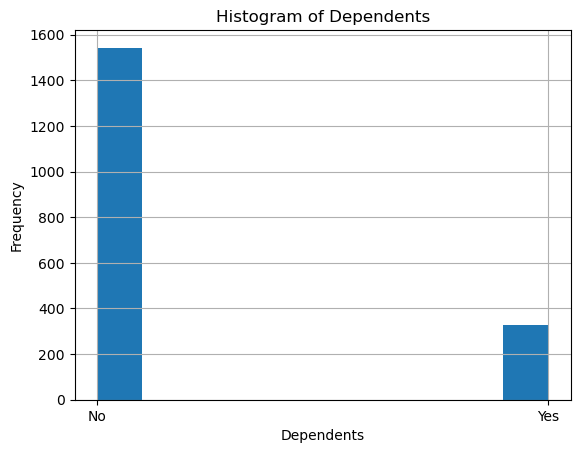

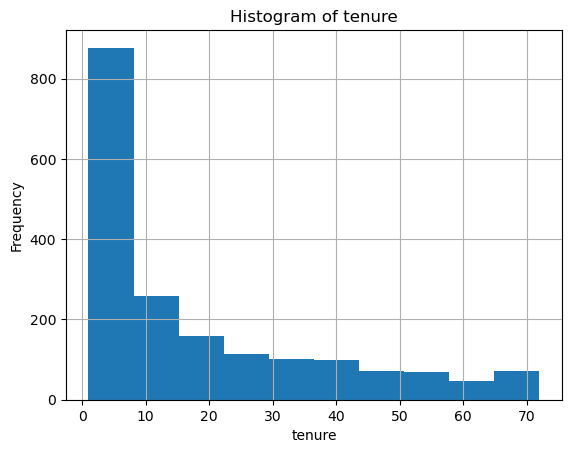

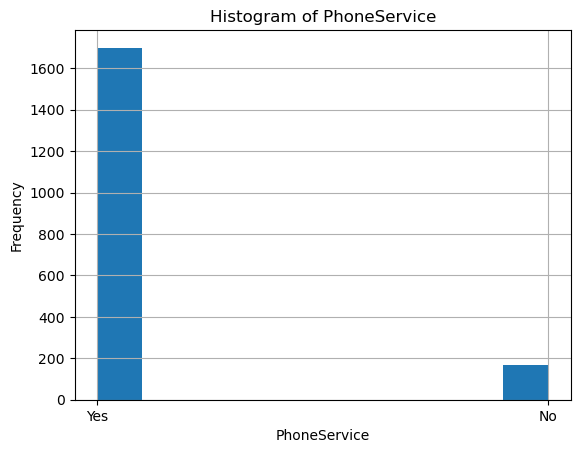

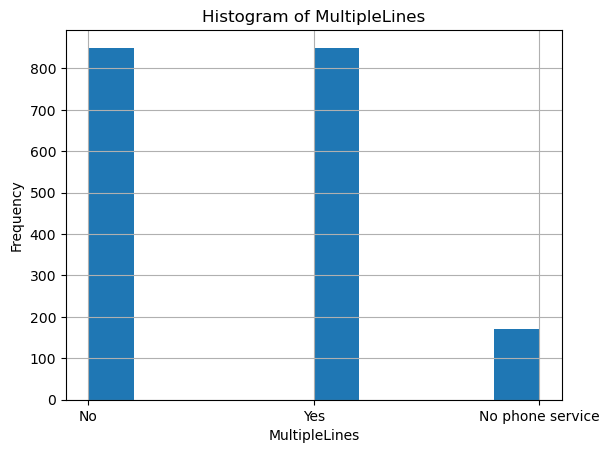

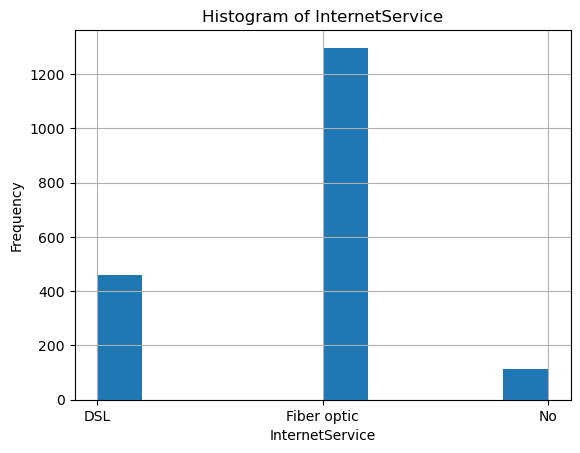

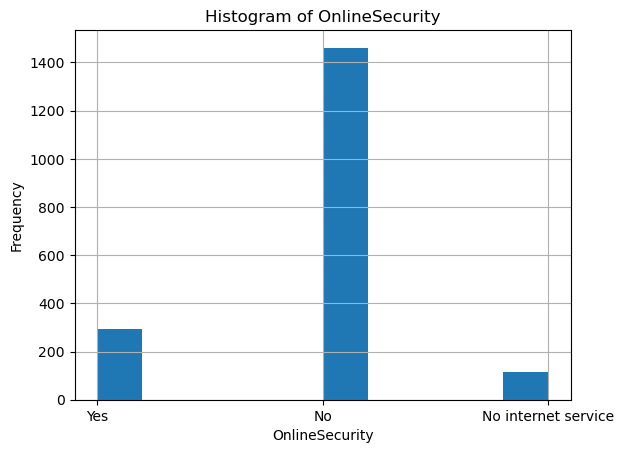

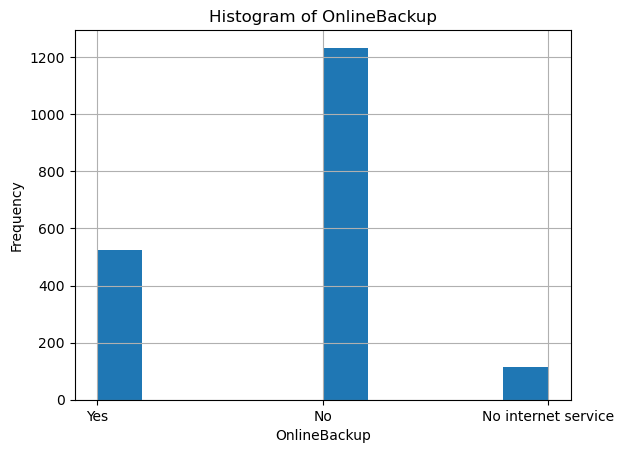

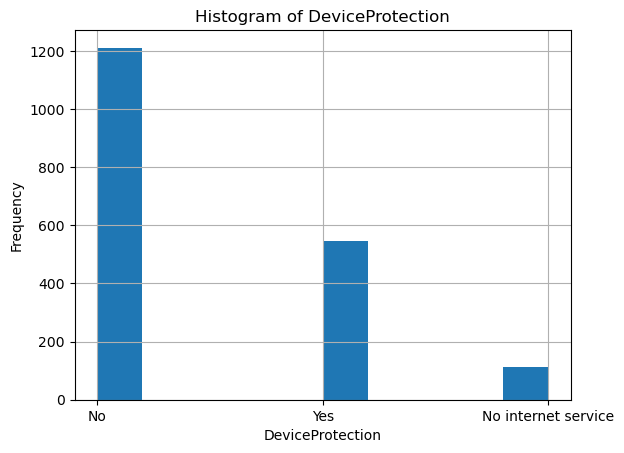

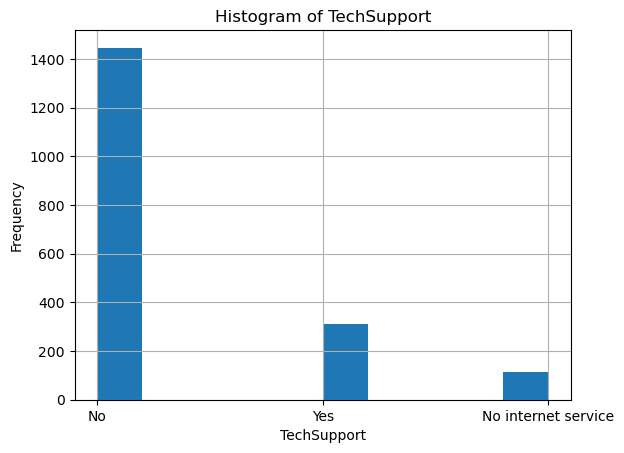

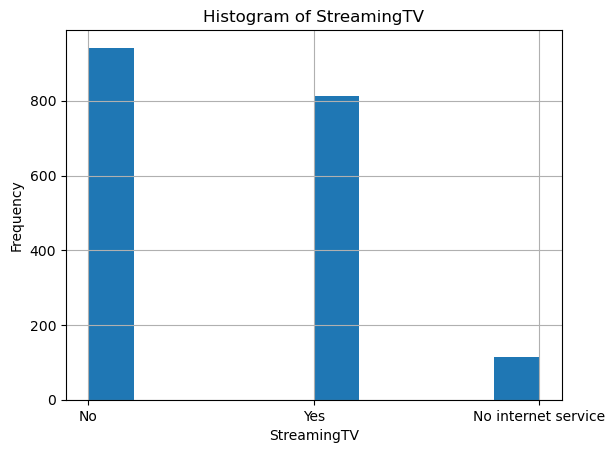

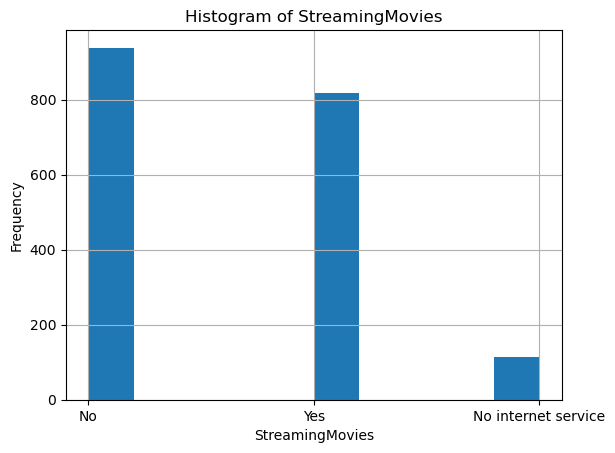

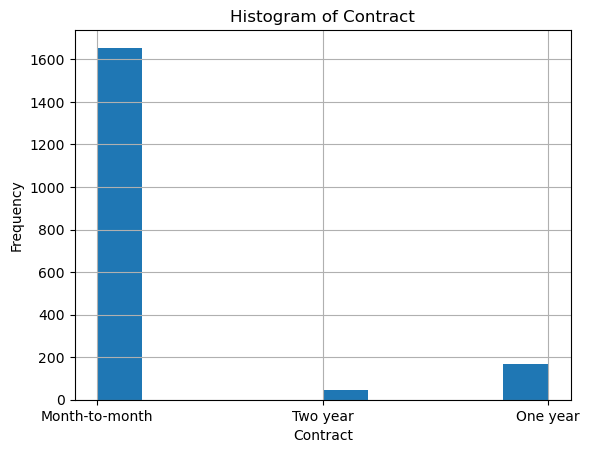

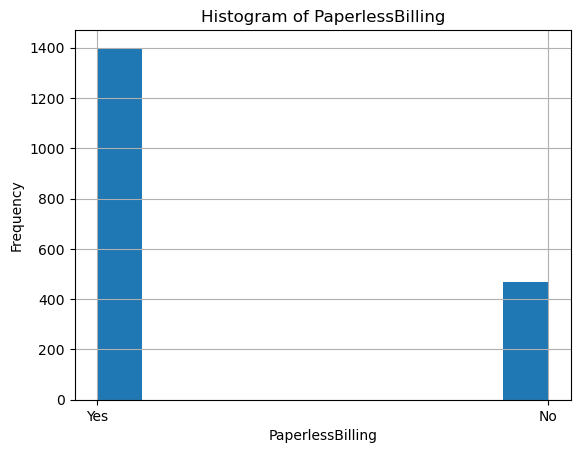

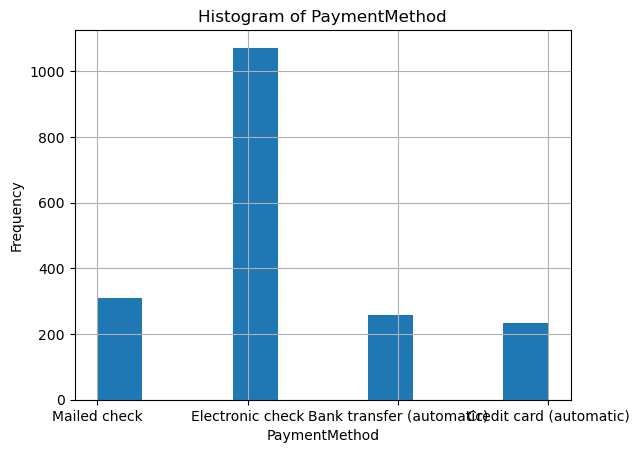

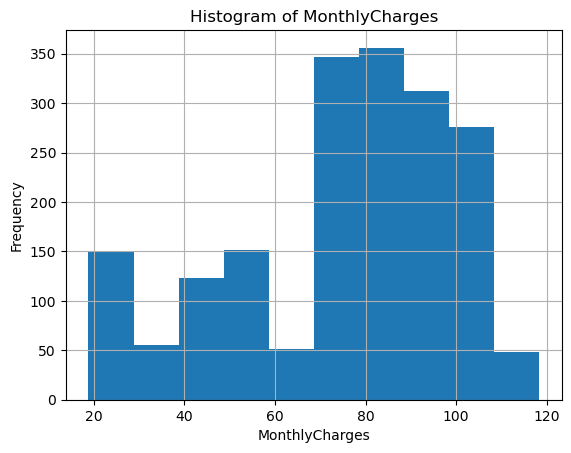

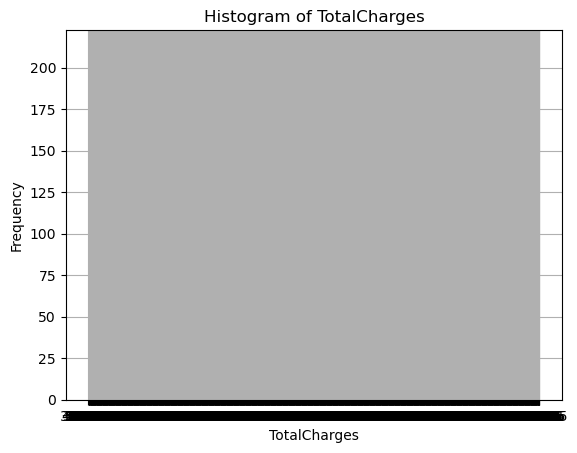

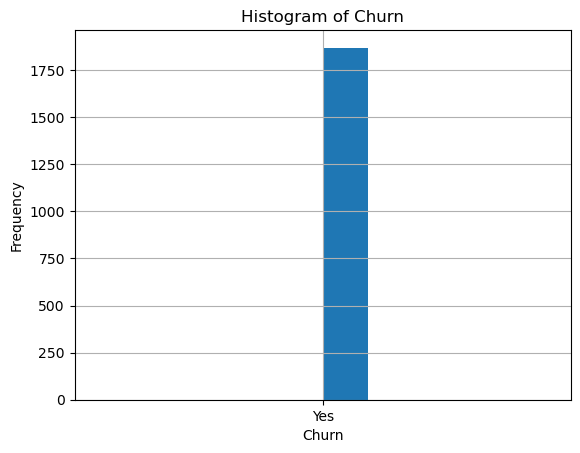

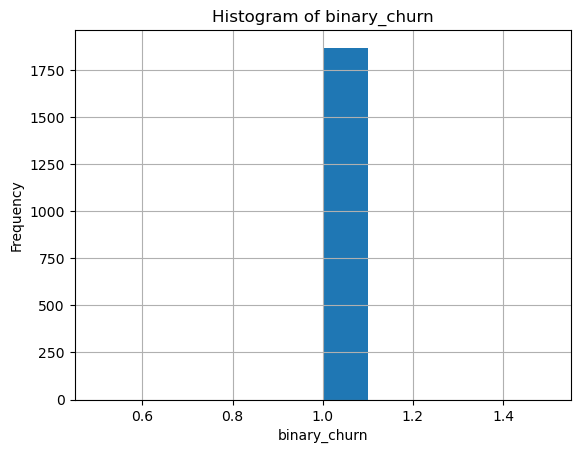

In [4]:
for column in churn_df:
    histogram(churn_df, column)

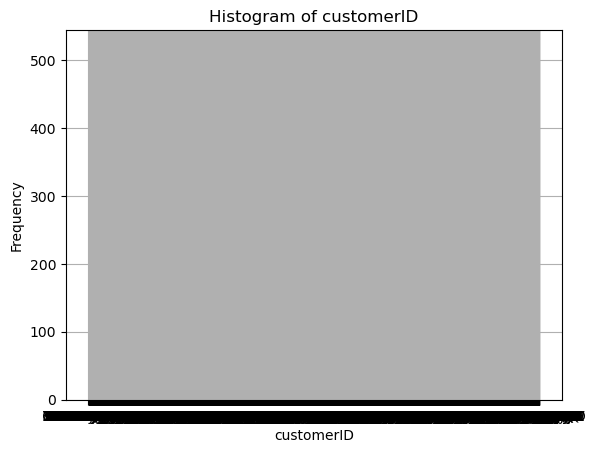

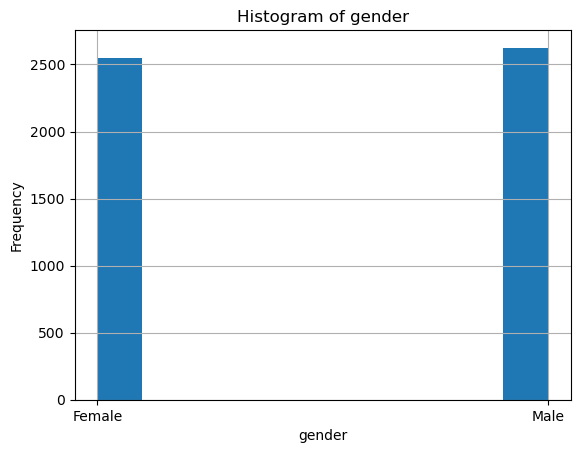

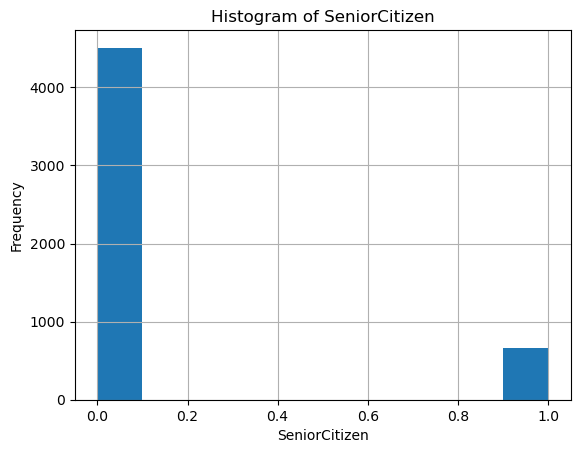

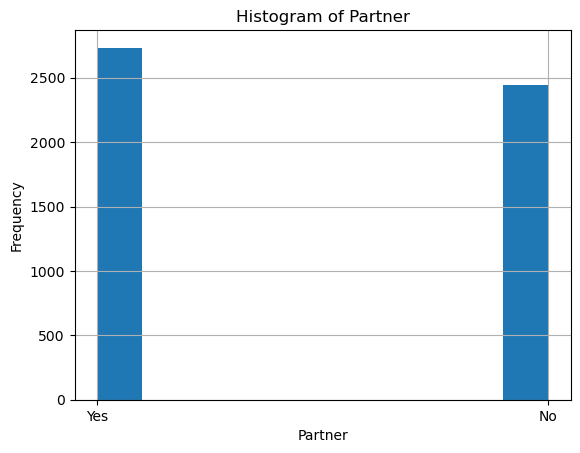

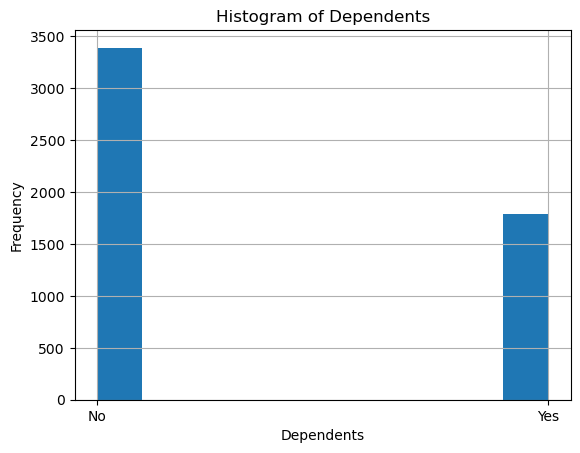

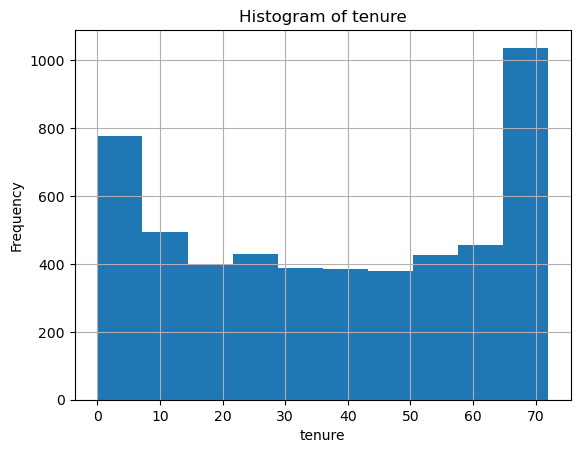

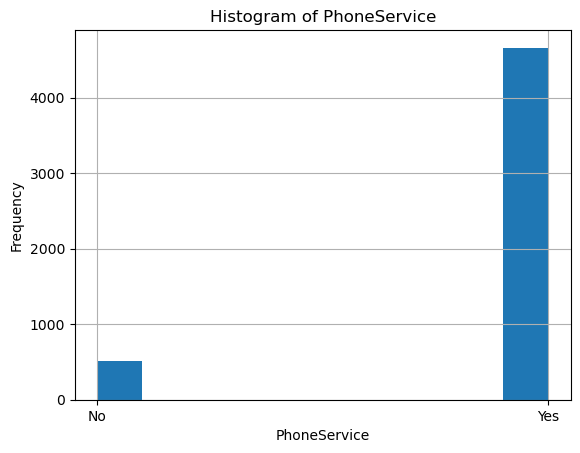

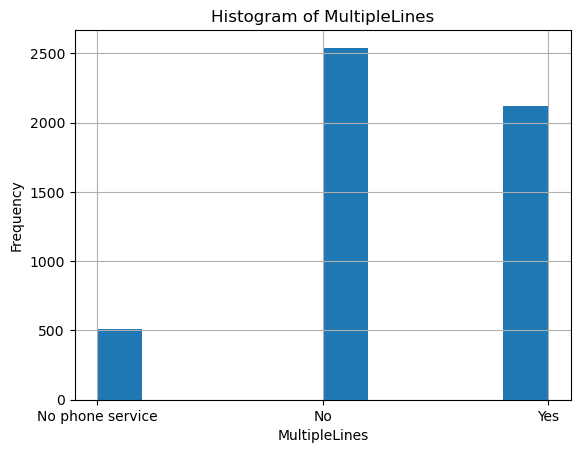

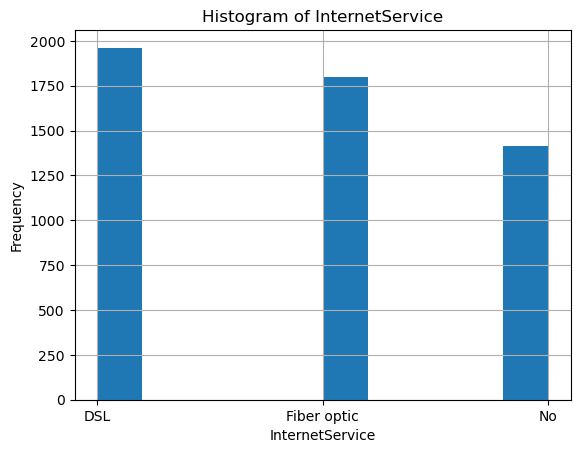

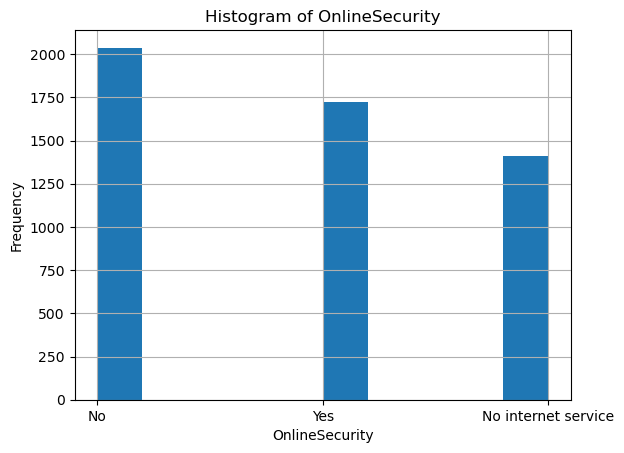

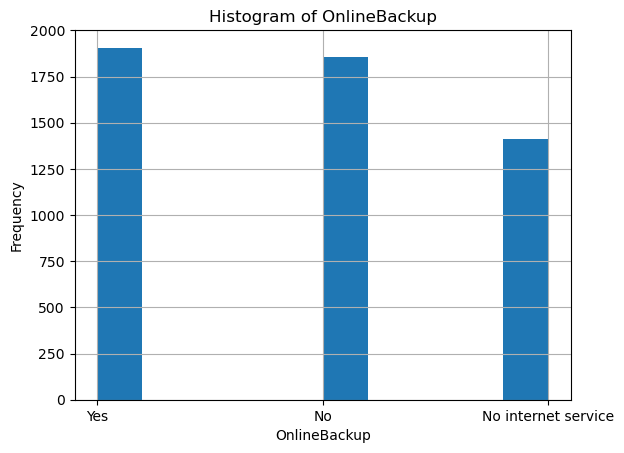

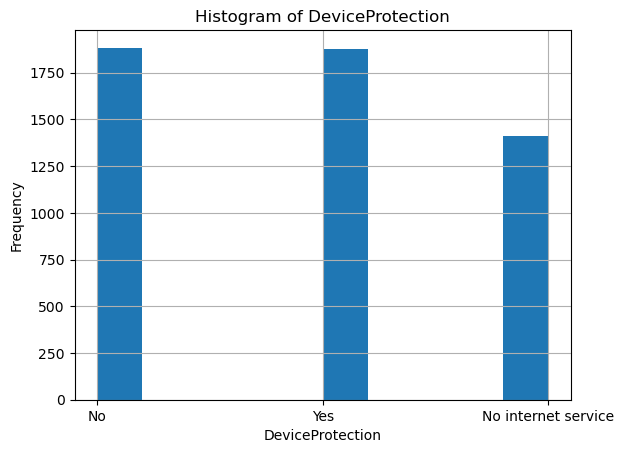

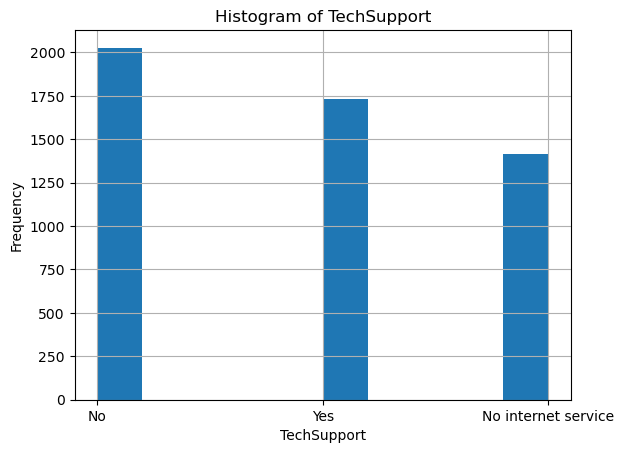

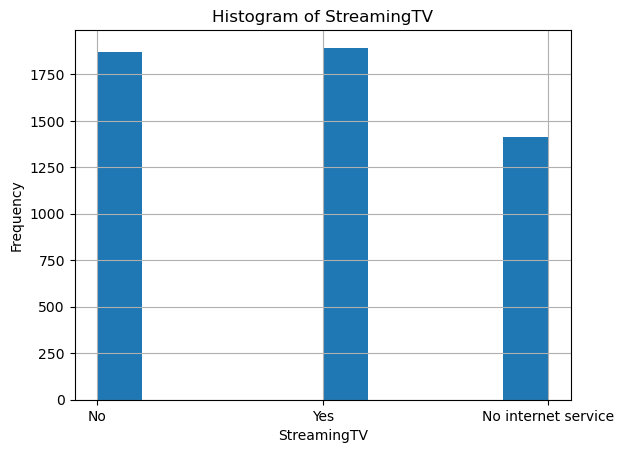

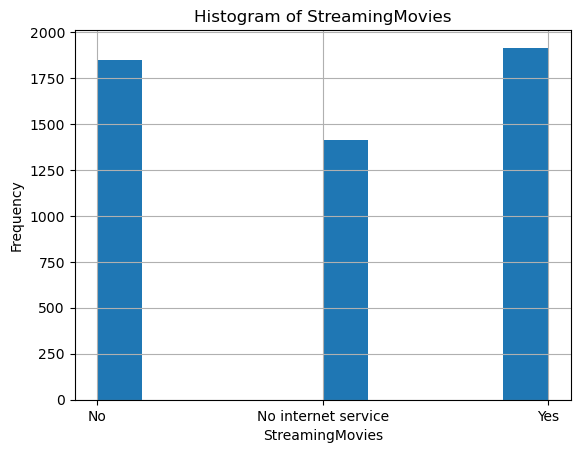

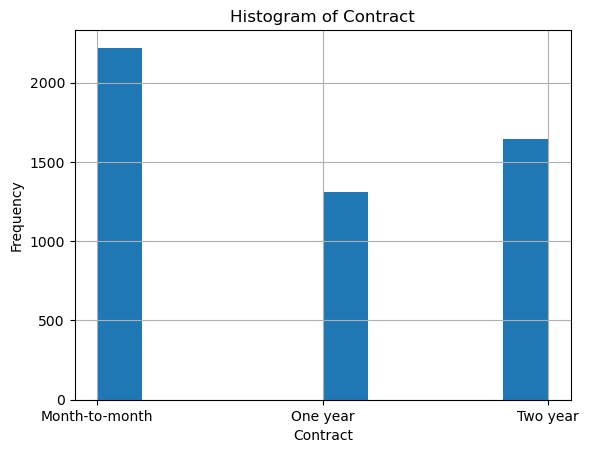

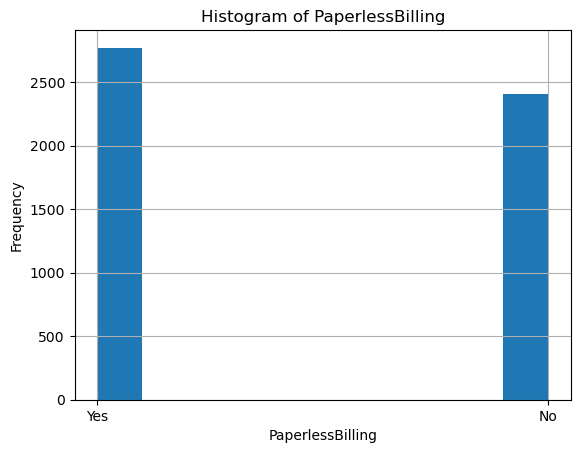

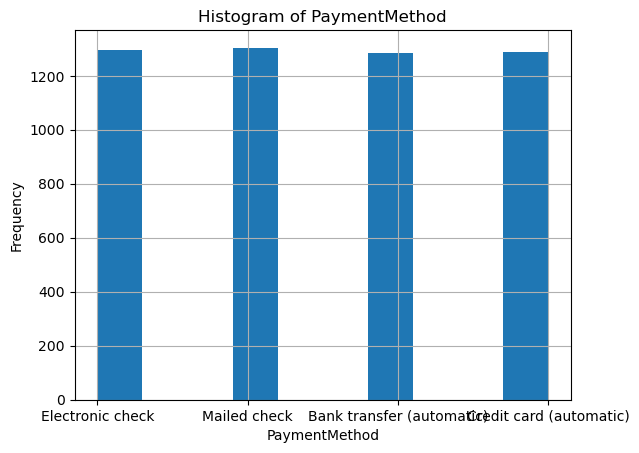

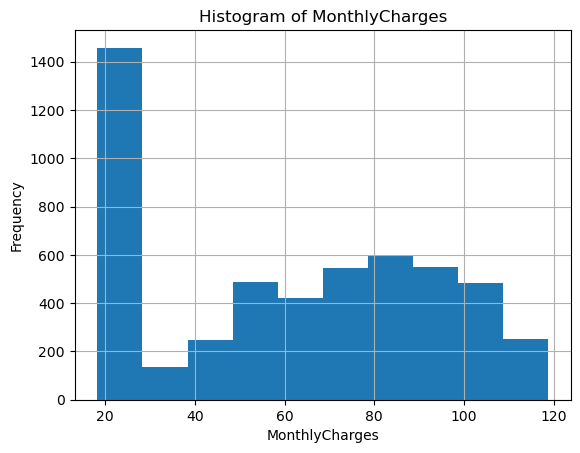

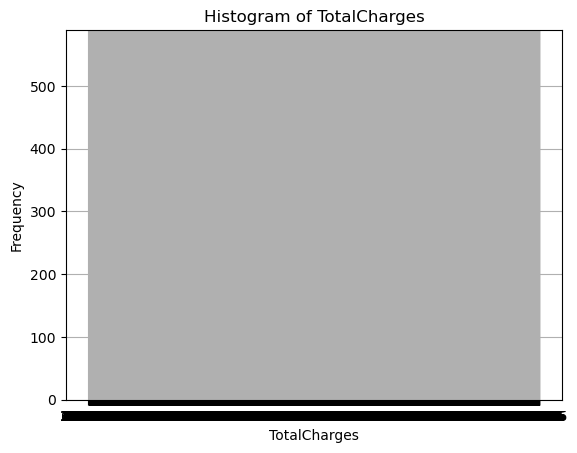

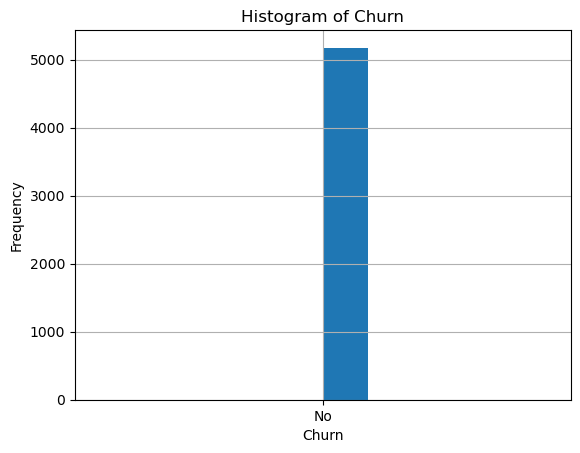

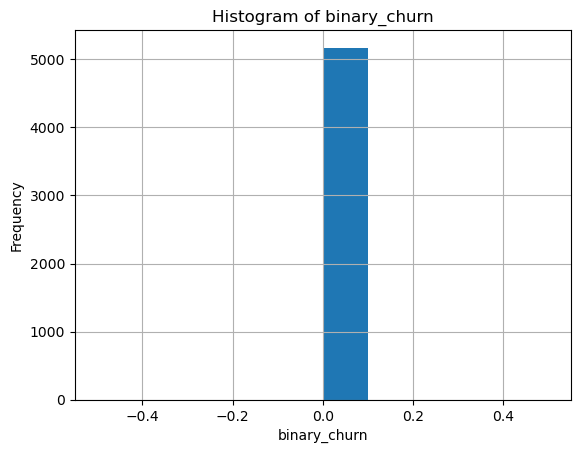

In [5]:
for column in retain_df:
    histogram(retain_df, column)

In [ ]:
# Dummy

In [3]:
columns_to_dummify = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'Contract', 'PaperlessBilling', 'PaymentMethod']

telco_dummy = pd.get_dummies(telco, columns=columns_to_dummify)

In [4]:
telco_final = pd.concat([telco, telco_dummy], axis=1)

In [5]:
telco_final = telco_final.drop(columns_to_dummify, axis=1)

In [6]:
telco_final = telco_final.drop(['Churn', 'customerID', 'TotalCharges'], axis=1)

In [7]:
telco_final.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'binary_churn',
       'SeniorCitizen', 'tenure', 'MonthlyCharges', 'binary_churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract

In [8]:
telco_final = telco_final.loc[:, ~telco_final.columns.duplicated()]

In [9]:
telco_final.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'binary_churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [3]:
# Models

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [11]:
X = telco_final.drop('binary_churn', axis=1)
y = telco_final['binary_churn']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
# Logistic Regression
logreg_model = LogisticRegression()

In [14]:
logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)

print("LR Accuracy:", accuracy_score(y_test, logreg_predictions))
print("LR Classification Report:\n", classification_report(y_test, logreg_predictions))

LR Accuracy: 0.8069552874378992
LR Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.62      0.57      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.80      1409



C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Random Forest
rf_model = RandomForestClassifier()

In [16]:
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, rf_predictions))
print("RF Classification Report:\n", classification_report(y_test, rf_predictions))

RF Accuracy: 0.7792760823278921
RF Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1061
           1       0.56      0.52      0.54       348

    accuracy                           0.78      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [ ]:
# ANALYSIS

In [17]:
import seaborn as sns

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features:")
print(feature_importance_df.head())

Top Features:
                           Feature  Importance
1                           tenure    0.195439
2                   MonthlyCharges    0.186464
35         Contract_Month-to-month    0.054795
17               OnlineSecurity_No    0.035120
42  PaymentMethod_Electronic check    0.032105


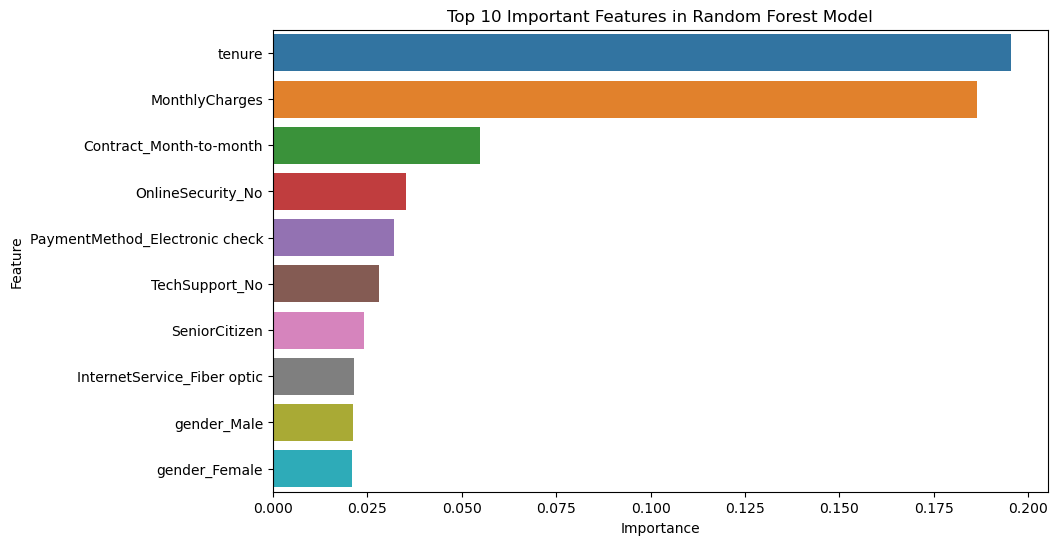

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features in Random Forest Model')
plt.show()

In [19]:
import numpy as np
coefficients = logreg_model.coef_[0]

In [20]:
coefficients = coefficients / np.sum(np.abs(coefficients))

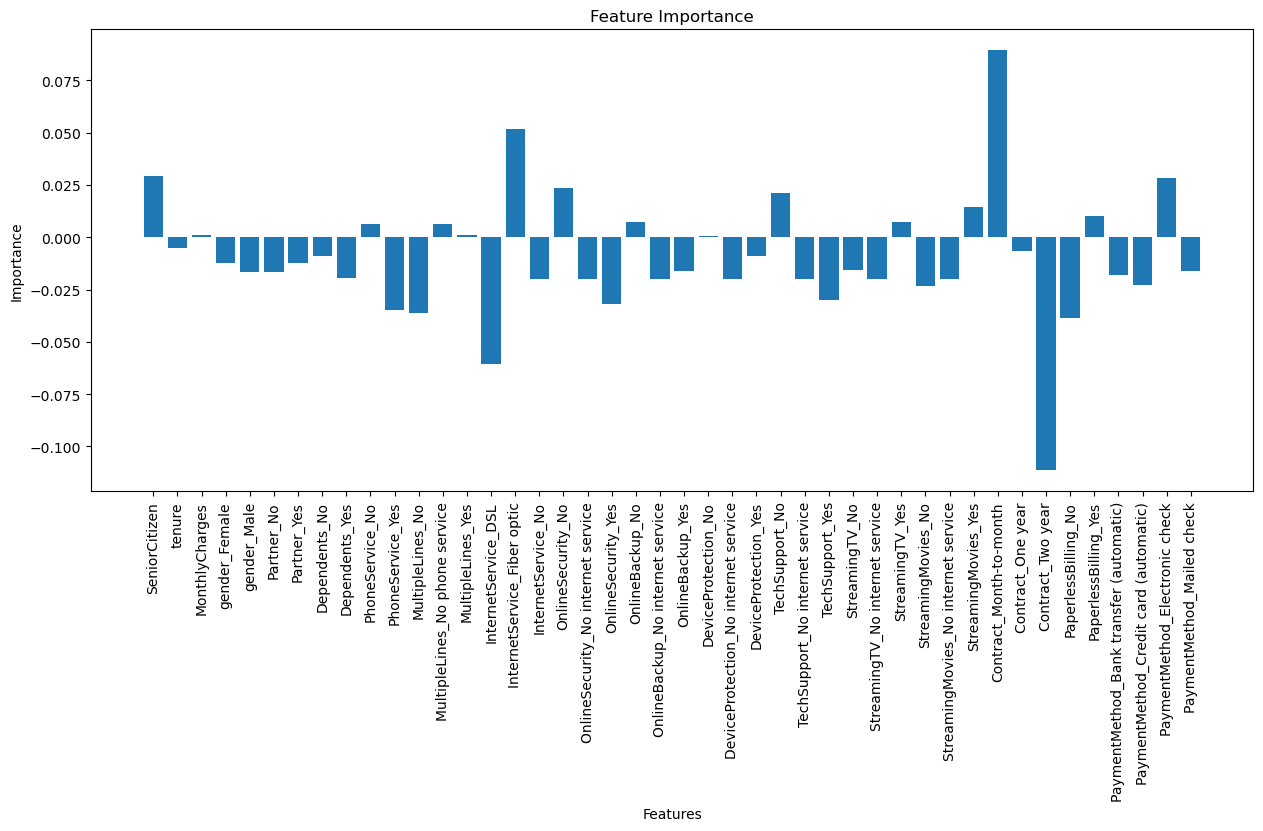

In [30]:
plt.figure(figsize=(15, 6))
plt.bar(range(len(coefficients)), coefficients, tick_label=X.columns)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()